# 2024-10-15 YCB Data Inspection

This notebook is to inspect the YCB data located in `../data/view_finder_XXX/`.

Looking for:
- Shape (RGBD, 640x480, 3 channels)
- Distribution of pixel values (for normalization)
- Distribution of rotation values (for "number of classes")
- Visualization

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the YCB data directory
data_dir = "../data/view_finder_224/eval/view_finder_rgbd/images"

# Get a list of all files in the directory
files = os.listdir(data_dir)

# Filter out directories and only keep image files
image_files = [file for file in files if file.endswith(('.npy'))]

# Print the list of image files
print(len(image_files))

2464


In [3]:
image_index = 0 # change this to see different images (0 ~ 2463)

# Load the first image file
image = np.load(os.path.join(data_dir, image_files[image_index]))

# shape, dtype, min, max, mean, std
print(image.shape) # (224, 224, 4)
print(image.dtype) # float64

(224, 224, 4)
float64
0.0
1.0
0.28006855431635747
0.41025792097544755


In [16]:
rgb = image[:, :, :3]   
print(f"rgb.min(): {rgb.min()}")
print(f"rgb.max(): {rgb.max()}")
print(f"rgb.mean(): {rgb.mean()}")
print(f"rgb.std(): {rgb.std()}")

depth = image[:, :, 3]
print(f"depth.min(): {depth.min()}")
print(f"depth.max(): {depth.max()}")
print(f"depth.mean(): {depth.mean()}")
print(f"depth.std(): {depth.std()}")


rgb.min(): 0.0
rgb.max(): 1.0
rgb.mean(): 0.10298715840502869
rgb.std(): 0.23219545884755166
depth.min(): 0.08141713589429855
depth.max(): 1.0
depth.mean(): 0.811312742050344
depth.std(): 0.36770668232880066


### Thoughts so far
- The RGB image is already normalized to be between [0, 1] (instead of uint8 [0, 255]). 
- The depth channel is also between [0, 1], with "background" being 1.0 and object being closer to 0.0 
- I may invert the depth channel so that the background is 0.0 and object is closer to 1.0, to be more intuitive.


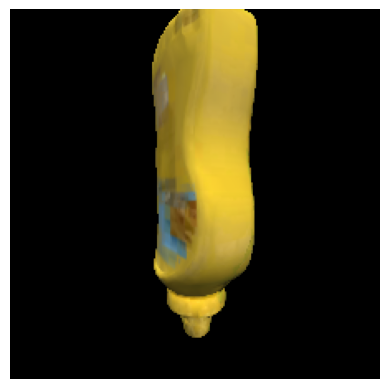

In [9]:
# Display the image (first three channels)
plt.imshow(image[:, :, :3])
plt.axis('off')
plt.show()

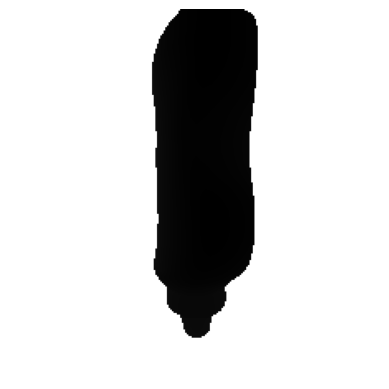

In [10]:
# last channel is depth
plt.imshow(image[:, :, 3], cmap='gray')
plt.axis('off')
plt.show()
